# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")


df = pd.read_csv(filename)

df.head(20)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
#exploring columns and seeing which ones have missing data
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)
print("\nColumn types: \n", df.dtypes)
df.shape

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

(1562, 19)

Label to predict: Confidence in national government


In [5]:
condition = nan_count != 0 # look for all columns with missing values

col_names = nan_count[condition].index # get the column names
print(col_names)

nan_cols = list(col_names) # convert column names to list
print(nan_cols)

Index(['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')
['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']


In [6]:
#the type of data for the missing data. helps also determine which ones we can drop
nan_col_types = df[nan_cols].dtypes
nan_col_types

Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
GINI index (World Bank estimate)                            float64
GINI index (World Bank estimate), average 2000-15           float64
gini of household income reported in Gallup, by wp5-year    float64
dtype: object

There are 3 GINI columns, so I will drop the one with the highest number of missing features. 

In [7]:
#replace missing values with means
for col in nan_cols:
    col_mean = df[col].mean()
    df[col].fillna(value = col_mean, inplace = True)
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)
df.head()
#make a copy of the cleaned df
df_og = df.copy(deep = True)

country                                                     0
year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by country-year           0
GINI ind

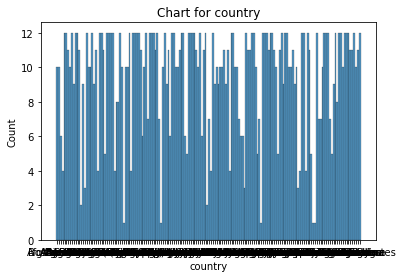

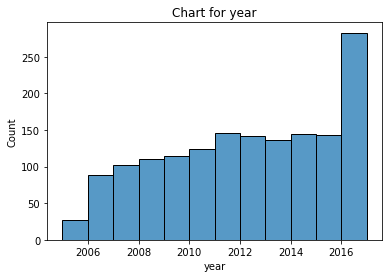

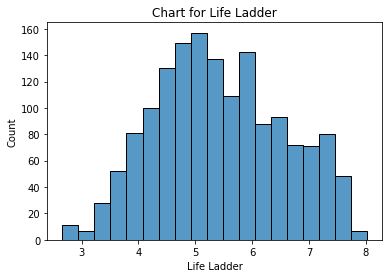

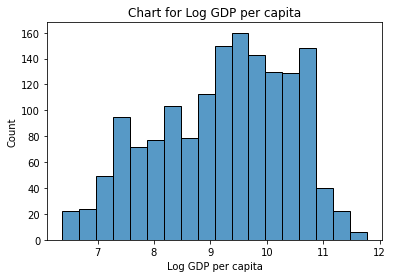

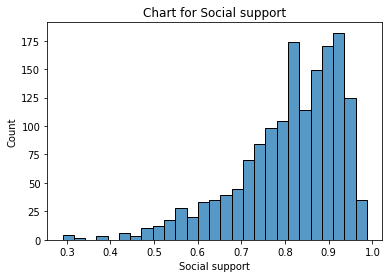

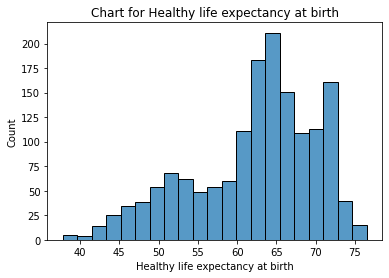

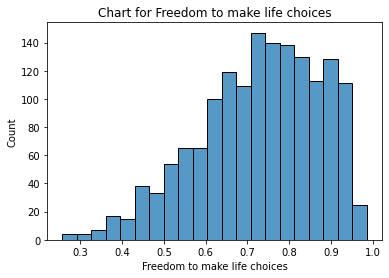

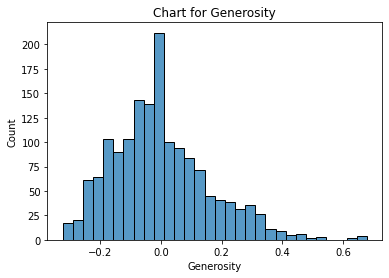

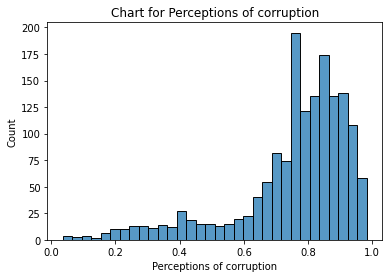

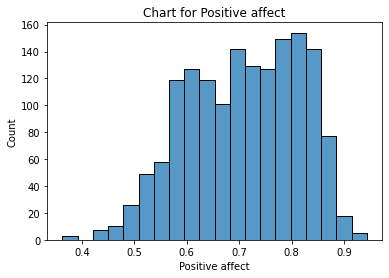

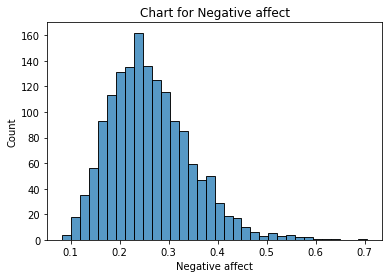

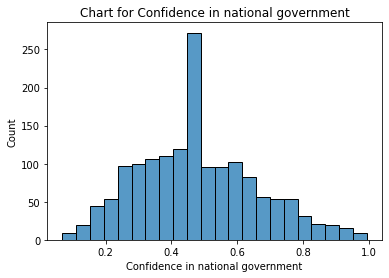

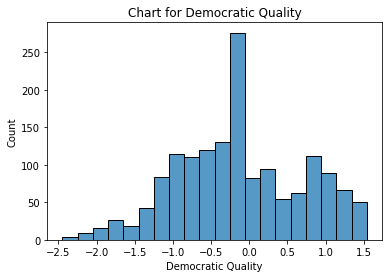

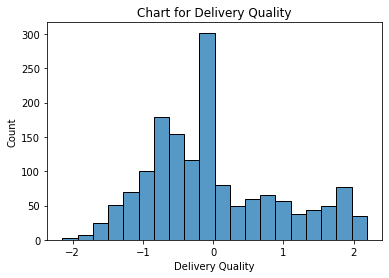

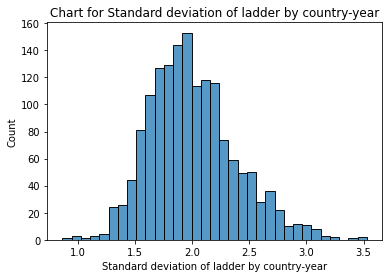

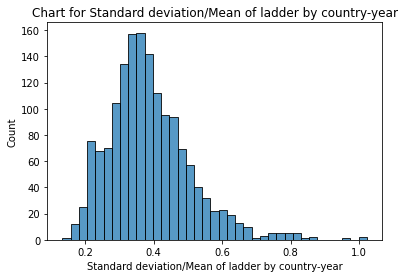

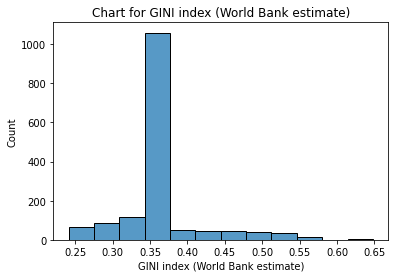

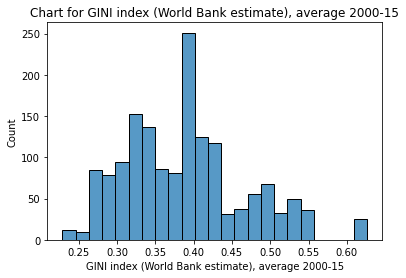

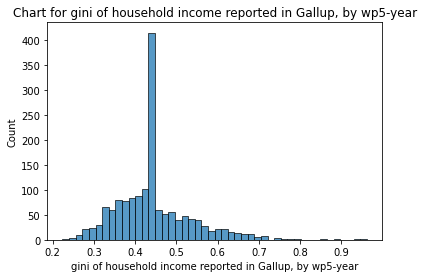

In [8]:
#checking for outliers by plotting each column
all_col = df.columns.tolist()
for col in all_col:
    plt.figure()
    sns.histplot(data=df, x=col)
    plt.title(f'Chart for {col}')
    plt.show()

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [9]:
#drop the columns based on relevancy
#drop year and country for now (year has concept drift and country needs to be one-hot encoded but there are 164 countries)
df.drop(['GINI index (World Bank estimate)', 'country', 'year', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year'], axis = 1, inplace = True)

In [10]:
#label: confidence in national government
y = df['Confidence in national government']
X = df.drop(columns = 'Confidence in national government', axis = 1)
X.columns.tolist()

['Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Democratic Quality',
 'Delivery Quality',
 'GINI index (World Bank estimate), average 2000-15',
 'gini of household income reported in Gallup, by wp5-year']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

This is a regression problem. I will first train and test a linear regression model and then a decision tree and compare the performance and tune hyperparameters. I will use the metrics of root mean squared error and r2 to evaluate the performance.

In [12]:
#first, train/test linear regression model
from sklearn.linear_model import LinearRegression

In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#test the model by making predictions on the test data
y_lr_pred = lr_model.predict(X_test)

In [15]:
#find the rmse and r2 to evaluate performance
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.14187358097752692
[LR] R2: 0.3718980848918537


Results for Linear Regression model: 

Root Mean Squared Error: 0.14187358097752692

R2: 0.3718980848918537 

Not very good, so will do some examination. First, let's look at feature importance

In [16]:
feature_importances = lr_model.coef_
feature_importances

array([-0.04069471,  0.01546377, -0.285528  , -0.00457711,  0.57117016,
        0.11931956, -0.37369771,  0.02074264, -0.14213304, -0.03088358,
       -0.00066152, -0.06023465, -0.13854596])

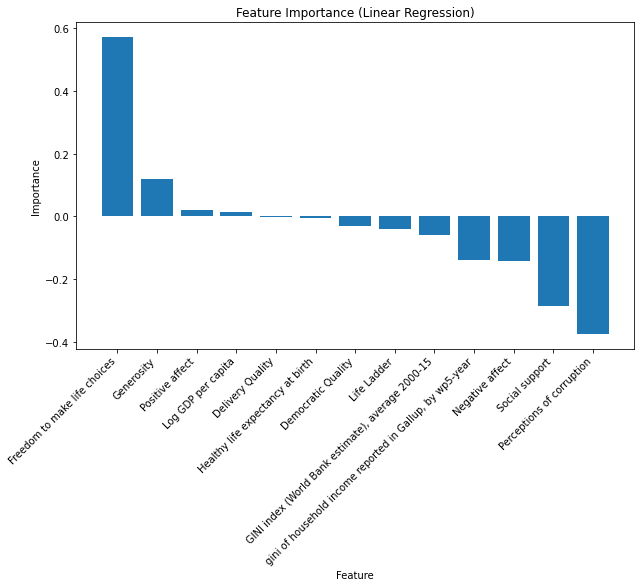

In [17]:
#Pandas df that stores the columns and their corresponding importance
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

#Sort the df and plot
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (Linear Regression)')
plt.show()

This shows us that the features on either end of the chart have the most weight in the outcome and the values in the middle have less importance to the outcome. Let's try dropping the middle features and seeing if that helps the model

In [18]:
df.drop(['Positive affect', 'Log GDP per capita', 'Delivery Quality', 'Healthy life expectancy at birth', 'Democratic Quality', 'Life Ladder'], axis = 1, inplace = True)

In [19]:
X = df.drop(columns = 'Confidence in national government', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

In [20]:
lr2_model = LinearRegression()
lr2_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_lr2_pred = lr2_model.predict(X_test)
lr2_rmse = mean_squared_error(y_test, y_lr2_pred, squared=False)
lr2_r2 = r2_score(y_test, y_lr2_pred)

print('[LR2] Root Mean Squared Error: {0}'.format(lr2_rmse))
print('[LR2] R2: {0}'.format(lr2_r2))

[LR2] Root Mean Squared Error: 0.15498018665628374
[LR2] R2: 0.2504865764234875


Removing more features didn't improve the model, it made it worse

[LR2] Root Mean Squared Error: 0.15498018665628374

[LR2] R2: 0.2504865764234875

In [22]:
feature_importances = lr2_model.coef_
feature_importances


array([-0.63760634,  0.4413756 ,  0.12020141, -0.29243604, -0.24979404,
        0.09252581, -0.03799814])

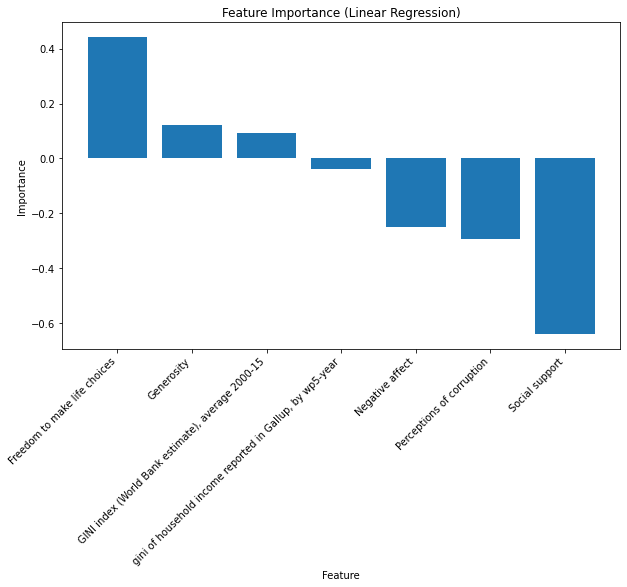

In [23]:
#Pandas df that stores the columns and their corresponding importance
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

#Sort the df and plot
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (Linear Regression)')
plt.show()

Let's try a different model, a decision tree. 
1. Make one without any arguments
2. Tune hyperparameters with gridsearch and try again

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
#reload all the data again
df = df_og.copy(deep = True)
df.drop(['GINI index (World Bank estimate)', 'country', 'year', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year'], axis = 1, inplace = True)

df.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,0.386948,0.445204
1,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,0.386948,0.441906
2,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,0.386948,0.327318
3,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,0.386948,0.336764
4,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,0.386948,0.344540


In [26]:
y = df['Confidence in national government']
X = df.drop(columns = 'Confidence in national government', axis = 1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

In [28]:
dt_model = DecisionTreeRegressor(random_state=123)

In [29]:
#make a parameter grid
params = {
    'min_samples_leaf': range(1, 51),
    'max_depth': range(1, 51)
}

In [30]:
#grid search instance
grid = GridSearchCV(estimator=dt_model, param_grid=params, verbose=2)

#fit the model
#grid.fit(X_train, y_train)

In [31]:
#get the best results
# print(grid.best_score_)
# best_params = grid.best_params_
# print(best_params)

Results:
    
max_depth=9, min_samples_leaf=15

Above cells are commented out to save run time for future

In [32]:
#make a decision tree model with these parameters to get the r2 and rmse
dt_model =  DecisionTreeRegressor(max_depth=9, min_samples_leaf=15)
dt_model.fit(X_train, y_train)

#get the scores
y_dt_pred = dt_model.predict(X_test)
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.13862241886971027
[DT] R2: 0.4003552971279063


Decision tree model did better than linear regression:

[DT] Root Mean Squared Error: 0.13862241886971027

[DT] R2: 0.4003552971279063

For comparision, this is from the first linear regression model:

Root Mean Squared Error: 0.14187358097752692

R2: 0.3718980848918537 

Thus, next I will try the ensemble method of random forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf_model = RandomForestRegressor(n_estimators = 20)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
y_rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))

[RF] Root Mean Squared Error: 0.10961556459639833
[RF] R2: 0.625051598569066


That's a lot better! Using grid search to find the best parameters next. But there are a lot more parameters for random forest, so first will try random search instead

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
#creating random forest model
rf_model = RandomForestRegressor(random_state=123)

In [38]:
#parameter grid
params = {
    'n_estimators': range(1, 2000),
    'min_samples_leaf': range(1, 51),
    'max_depth': range(1, 51),
    'min_samples_split': range(1, 51),
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt'],
}

In [39]:
#random searching. 100 combinations chosen at random, cross fold validation of 5
grid=RandomizedSearchCV(estimator=rf_model, param_distributions=params, n_iter=100, cv=5, verbose=2, random_state=123)

In [40]:
#now fitting the grid
#grid.fit(X_train, y_train)

In [41]:
#rf_best_params = grid.best_params_
#rf_best_params

Result:

{'bootstrap': True,
 'max_depth': 49,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 11,
 'n_estimators': 853}
 
That took a long time to run. Next time, I will do less cross validation folds to cut down on the time. This cell will be commented out so I don't have to run it again

In [42]:
#train and test the random forest with the new parameters
rf_model = RandomForestRegressor(bootstrap= True,
 max_depth= 49,
 max_features= 'sqrt',
 min_samples_leaf= 2,
 min_samples_split= 11,
 n_estimators= 853)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))

[RF] Root Mean Squared Error: 0.1085921018630879
[RF] R2: 0.6320205765870481


Now with hyperparameters tuned, the results are improved:

[RF] Root Mean Squared Error: 0.10834062131548197

[RF] R2: 0.6337229566382863

I want to see what features impact the result the most, so I will do what I did before and plot the feature importance.


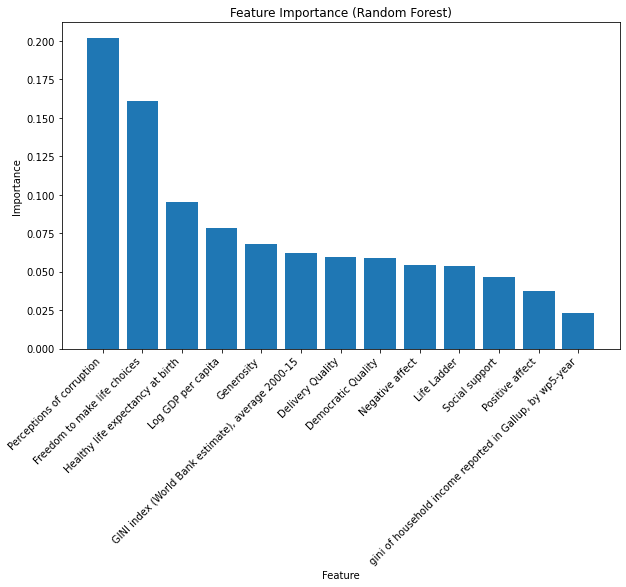

In [43]:
feature_importances = rf_model.feature_importances_
feature_importances
#Pandas df that stores the columns and their corresponding importance
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

#Sort the df and plot
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

Based on this, it seems as it what contributes most heavily to confidence in national government is perception of corruption, freedom to make life choices, and healthy life expextancy at birth which does make sense especially the first two.

The random forest ensemble method seems to work pretty well with a relatively high r2 value and low rsme value. I want to try other ensemble methods next, especially gradient boosting because it is another decision tree ensemble method and decision trees seem to work well for this dataset. 

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
gb_model = GradientBoostingRegressor(n_estimators = 1000)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
y_gb_pred = gb_model.predict(X_test)
gb_rmse = mean_squared_error(y_test, y_gb_pred, squared=False)
gb_r2 = r2_score(y_test, y_gb_pred)

print('[GB] Root Mean Squared Error: {0}'.format(gb_rmse))
print('[GB] R2: {0}'.format(gb_r2))

[GB] Root Mean Squared Error: 0.10537508839370817
[GB] R2: 0.6535002225615745


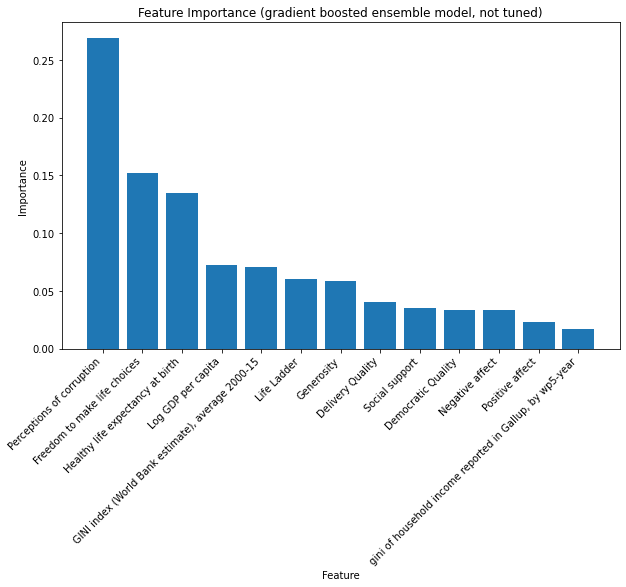

In [47]:
feature_importances = gb_model.feature_importances_
feature_importances
#Pandas df that stores the columns and their corresponding importance
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

#Sort the df and plot
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (gradient boosted ensemble model, not tuned)')
plt.show()

That did worse than the random forest ensemble with the same number of n_estimators (20) but when I run it with more n_estimators, the performance increases greatly and is better than the tuned random forest already. There didn't seem to be a difference in performance between 500 and 1000 n_estimators, but these are the results for 1000 n_estimators:

[GB] Root Mean Squared Error: 0.10567752892729873

[GB] R2: 0.6515083672225672

I will be using grid search cv next to tune the hyperparameters. For this one, because gradient boosting ensemble model involves trees and boosting, I will be tuning the parameters in steps. I will first tune the tree based parameters, then I will tune the boosting parameters. Generally, I will try and tune the more impactful parameters first.

Steps:

1. Find how many trees are optimal
2. Tune tree parameters (like number of trees, max depth, min samples per leaf)
3. Tuning learning rate/other boosting parameters

I am basing my process on this guide: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/ 

In [48]:
from sklearn.metrics import make_scorer
#make custom scoring functions
r2_scorer = make_scorer(r2_score)
rmse_scorer = make_scorer(mean_squared_error, squared=False)
score_params = {'r2': r2_scorer, 'rmse': rmse_scorer}

In [49]:
#find best number of trees first
tree_params = {'n_estimators': range(1800, 2100, 100)}
#set initial values of parameters, will be adjusted later
tree_gb_model = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,
                                          min_samples_leaf=50,max_depth=8,max_features='sqrt',
                                          subsample=0.8,random_state=123)
tree_grid = GridSearchCV(estimator=tree_gb_model, param_grid = tree_params, scoring = score_params, refit = 'r2', cv=5)
#tree_grid.fit(X_train, y_train)

In [50]:
#find best values
#tree_grid.best_params_, tree_grid.best_score_

Results:

({'n_estimators': 270}, 0.5663095143991221)

From running multiple different ranges, it appears that the more trees the better it does but it will take longer to test other parameters. I'll just set it at 270 for now since it seems like a good place to start and see at the end with the new parameters if increasing n_estimators significantly improves the performance compared to the amount of time it takes to run

In [51]:
#tuning the tree specific parameters now
tree2_params = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
tree2_model = GradientBoostingRegressor(learning_rate = .2, n_estimators = 270,
                                        max_features='sqrt', subsample=0.8, random_state=123)
tree2_grid = GridSearchCV(estimator= tree2_model, param_grid=tree2_params,  scoring = score_params, refit = 'r2', cv=5)
#tree2_grid.fit(X_train, y_train)

In [52]:
#find best values
#tree2_grid.best_params_, tree2_grid.best_score_

Results:

({'max_depth': 7, 'min_samples_split': 200}, 0.6410644282305178)

In [53]:
#next set of tree hyperparameter tuning
#going to test min_samples_split with a lower range since before the lowest value was the best
#also testing min_samples_leaf
tree3_params = {'min_samples_split':range(2, 200, 50), 'min_samples_leaf':range(30,71,10)}
tree3_model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=270,max_depth=7,
                                        max_features='sqrt', subsample=0.8, random_state=123)
tree3_grid = GridSearchCV(estimator= tree3_model, param_grid=tree3_params,  scoring = score_params, refit = 'r2', cv=5)
#tree3_grid.fit(X_train, y_train)

In [54]:
#tree3_grid.best_params_, tree3_grid.best_score_

 Score for when:
 
 Min samples split < 100: 0.6575603866793178 (doesn't change much as it goes lower)
 
 Mine samples split = 100: 0.6502123557306686
 
 Min samples split = 200: 0.6420205222181874
 
 The smaller min samples split, the more complex the tree even if scoring does improve, so I'm just going to keep it at 100 
 
 min_samples_leaf's best value is always 30

In [55]:
#tune max features now
tree4_params = {'max_features':range(1,13)}
tree4_model =  GradientBoostingRegressor(learning_rate=0.1, n_estimators=270,max_depth=7,
                                        subsample=0.8, min_samples_split = 100, min_samples_leaf = 30,
                                         random_state=123)
tree4_grid = GridSearchCV(estimator = tree4_model, param_grid=tree4_params,  scoring = score_params, refit = 'r2', cv=5)
#tree4_grid.fit(X_train, y_train)

In [56]:
#tree4_grid.best_params_, tree4_grid.best_score_

Result: ({'max_features': 8}, 0.6630246718036588)

So far, the parameters we have:

- n_estimators = 270
- min_samples_split: 100
- min_samples_leaf: 30
- max_depth: 7
- max_features: 8


In [57]:
tree5_model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=270,max_depth=7,
                                        subsample=0.8, min_samples_split = 100, min_samples_leaf = 30,
                                        max_features = 8,
                                         random_state=123)
tree5_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=8, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=30, min_samples_split=100,
                          min_weight_fraction_leaf=0.0, n_estimators=270,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
y_tree5_pred = tree5_model.predict(X_test)
tree5_rmse = mean_squared_error(y_test, y_tree5_pred, squared=False)
tree5_r2 = r2_score(y_test, y_tree5_pred)

print('[tree5] Root Mean Squared Error: {0}'.format(tree5_rmse))
print('[tree5] R2: {0}'.format(tree5_r2))

[tree5] Root Mean Squared Error: 0.10517599098378047
[tree5] R2: 0.6548083502509776


Score:
    
[tree5] Root Mean Squared Error: 0.10517599098378047
    
[tree5] R2: 0.6548083502509776

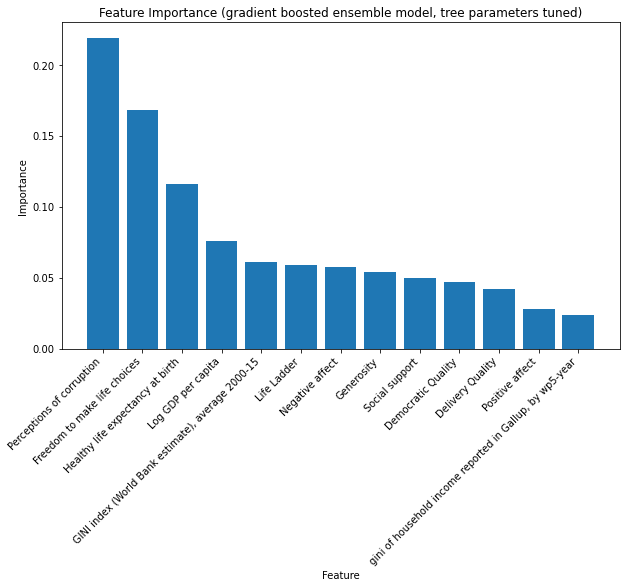

In [59]:
feature_importances = tree5_model.feature_importances_
feature_importances
#Pandas df that stores the columns and their corresponding importance
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

#Sort the df and plot
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (gradient boosted ensemble model, tree parameters tuned)')
plt.show()

With these tree parameters tuned, you can see that each feature is more important now! (compared to the untuned very first gradient boosted ensemble model where the perception of corruption was much higher weighted compared to the other features) The other features have become more valuable to the final prediction

In [60]:
#tuning subsample parameter
sub_params = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
sub_model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=270,max_depth=7,
                                        min_samples_split = 100, min_samples_leaf = 30,
                                        max_features = 8, random_state=123)
sub_grid = GridSearchCV(estimator=sub_model, param_grid=sub_params, scoring = score_params, refit = 'r2', cv=5)
#sub_grid.fit(X_train, y_train)

In [61]:
#sub_grid.best_params_, sub_grid.best_score_

Turns out .8 (original value) is good. Result: ({'subsample': 0.8}, 0.6630246718036588)

Now we have all the parameters we need:
- n_estimators: 270
- min_samples_split: 100
- min_samples_leaf: 30
- max_depth: 7
- max_features: 8
- subsample: .8

Can see if decreasing learning rate and increasing n_estimators will make the model better as well

In [62]:
final_model = GradientBoostingRegressor(learning_rate=0.0025, n_estimators=10800,max_depth=7,
                                        subsample=0.8, min_samples_split = 100, min_samples_leaf = 30,
                                        max_features = 8,
                                         random_state=123)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.0025, loss='ls',
                          max_depth=7, max_features=8, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=30, min_samples_split=100,
                          min_weight_fraction_leaf=0.0, n_estimators=10800,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
y_final_pred = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, y_final_pred, squared=False)
final_r2 = r2_score(y_test, y_final_pred)

print('[final] Root Mean Squared Error: {0}'.format(final_rmse))
print('[final] R2: {0}'.format(final_r2))

[final] Root Mean Squared Error: 0.10305252926765031
[final] R2: 0.6686062093116337


Decrease learning rate and increase n_estimators by 10:

[final] Root Mean Squared Error: 0.10316586933118856
[final] R2: 0.667876856069415

Decrease learning rate and increase n_estimators by 40:

[final] Root Mean Squared Error: 0.10305252926765031
[final] R2: 0.6686062093116337

Slight improvement in performance between the two and significant improvement from a learning rate of .1 and n_estimators of 270 (from above):

[tree5] Root Mean Squared Error: 0.10517599098378047
[tree5] R2: 0.6548083502509776

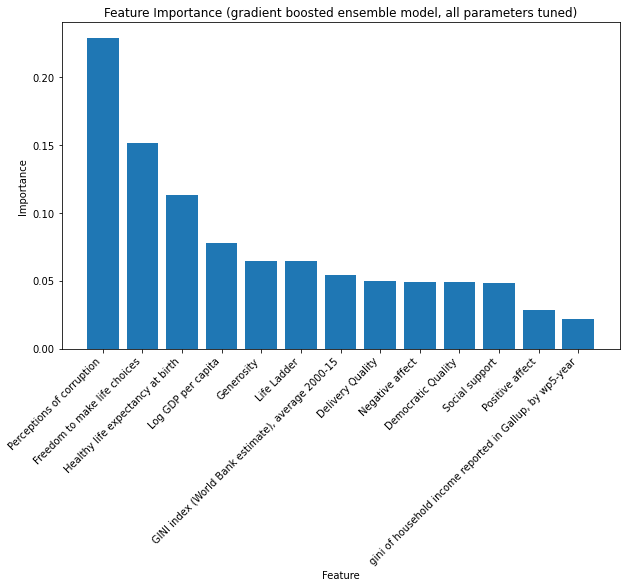

In [64]:
feature_importances = final_model.feature_importances_
feature_importances
#Pandas df that stores the columns and their corresponding importance
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

#Sort the df and plot
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (gradient boosted ensemble model, all parameters tuned)')
plt.show()

Interestingly, it seems as if the imbalance in feature importance increased a little in the final model compared to the tree5 model. Could be that more n_estimators -> data got skewed

Now, to further explore the features more, a dependency plot between the most importance feature 'Perception of corruption' and the label 'Confidence in national government'

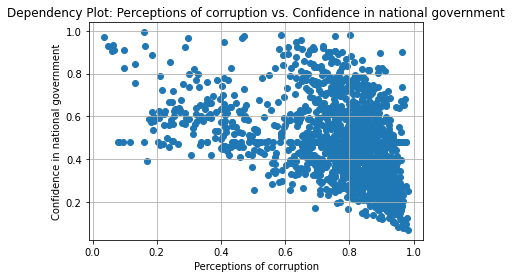

In [74]:
plt.scatter(df['Perceptions of corruption'], df['Confidence in national government'], marker='o')
plt.xlabel('Perceptions of corruption')
plt.ylabel('Confidence in national government')
plt.title('Dependency Plot: Perceptions of corruption vs. Confidence in national government')

plt.grid(True)
plt.show()

So there definitely is a correlation between higher levels of perception of corruption annd lower confidence in the national government. However, data is more sparse around very low perceptions of corruption and high levels of confidence. 

To see if there is actually a cause and effect and not just this reflecting the effects of other features, let's do a partial dependency plot.

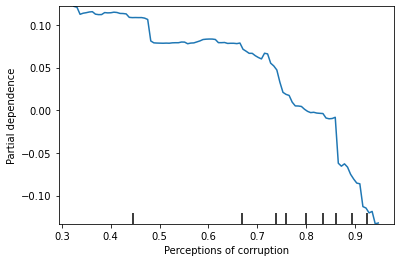

In [84]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(final_model, X_train, [df.columns.get_loc('Perceptions of corruption')])

So once other features were controlled for, there is still a strong relationship between the label and the most important feature, meaning that this feature does truly have a very important effect on the prediction of the label.

Conclusion:

Gradient Boosted ensemble method had the best performance. Graph below of the R2 and RMSE scores of linear regression, decision trees, random forests, and gradient boosted models.

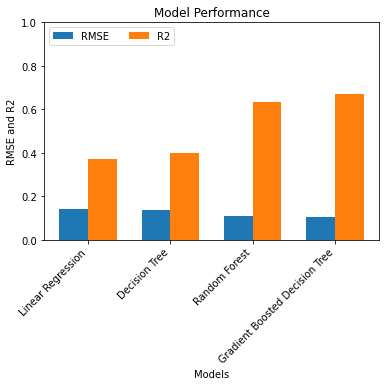

In [65]:
#create bar plot comparing results of all the different models
RMSE_Results = [lr_rmse, dt_rmse, rf_rmse, final_rmse]
R2_Results = [lr_r2, dt_r2, rf_r2, final_r2]

rg= np.arange(4)
width = 0.35

plt.bar(rg - width/2, RMSE_Results, width, label='RMSE')
plt.ylabel('RMSE')

plt.bar(rg + width/2, R2_Results, width, label='R2')
plt.ylabel('R2')

plt.xticks(rg, ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosted Decision Tree'], rotation=45, ha='right')


plt.xlabel('Models')
plt.ylabel('RMSE and R2')

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

Clearly, the ensemble methods did significantly better and out of the ensemble methods, the gradient boosted decision tree ensemble method did the best. Additionally, the most important feature for predictions was "Perceptions of corruption" which does make sense logically.

Note: the grid searches are commented out in the code so it doesn't take a very long time to run it from start to end.